# Load data

In [75]:
%matplotlib inline

import pandas as pd
import glob
import matplotlib.pyplot as plt
import os

In [48]:
result_files = glob.glob("results/seed*-R10-*.csv")

li = []

for filename in result_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    
    f = open(filename + '.meta', "r")
    meta = f.read().split('\n')
    df['seed'] = meta[0][7:]
    df['method'] = meta[1][10:]
    df['lr_schedule'] = meta[4][14:]
    
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# Aggregate results

In [67]:
def filter_best_results(df):
    idx = df.groupby(['max_iter'], sort=False)['test_loss'].transform(min) == df['test_loss']
    return df[idx]

In [68]:
def aggregate_results(df, schedule):
    hb = filter_best_results(df[(df['method'] == 'Hyperband') & (df['lr_schedule'] == schedule)]).sort_values('max_iter')
    sh = filter_best_results(df[(df['method'] == 'Successive_halving') & (df['lr_schedule'] == schedule)]).sort_values('max_iter')
    return pd.concat([hb, sh])

# Visualize

In [69]:
schedules = ['Linear', 'LambdaLR', 'StepLR', 'ExponentialLR', 'CyclicLR']

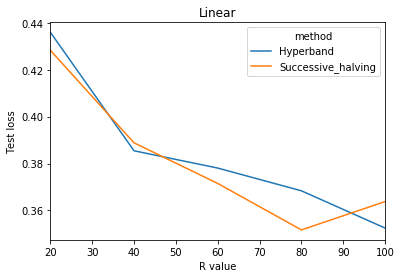

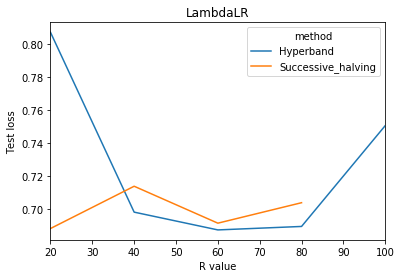

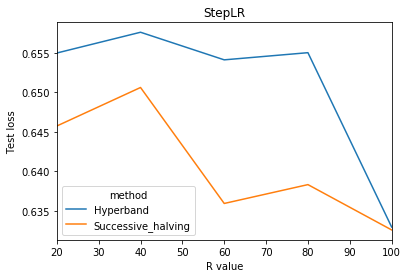

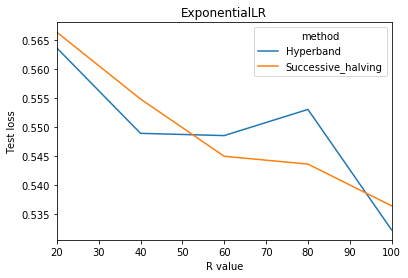

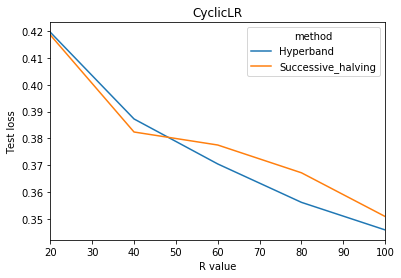

In [77]:
if not os.path.exists('plots'): os.makedirs('plots')
    
for schedule in schedules:
    pivot = aggregate_results(df, schedule).pivot(index='max_iter', columns='method', values='test_loss')
    ax = pivot.plot(title=schedule)
    ax.set_xlabel("R value")
    ax.set_ylabel("Test loss")
    ax.get_figure().savefig('plots/' + schedule.lower() + '.png')